In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 

sys.path.append(os.path.abspath("../src/"))
from utils.utils import load_data, clean_data, map_ip_to_city, plot_stacked_bar, plot_violin, plot_bar, plot_distribution

In [73]:
creditcard_df = load_data("../data/raw/creditcard.csv")
fraud_df = load_data("../data/raw/Fraud_Data.csv")
IP_to_country_df = load_data("../data/raw/IpAddress_to_Country.csv")
print("All data succsessfully loaded")

All data succsessfully loaded


In [36]:
# Display the creditcard DataFrame
creditcard_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [37]:
# Display the datatypes of the columns of creditcard_df
creditcard_df.dtypes # v1 to v28 are anonymized PCA transformed columns

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [38]:
# Display the Fraud DataFrame
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [39]:
# Display the datatype of the coulmns of fraud_df
fraud_df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [40]:
fraud_df["ip_address"].describe() # We have numerical ip addresses, which we will use to mapt to geo locations

count    1.511120e+05
mean     2.152145e+09
std      1.248497e+09
min      5.209350e+04
25%      1.085934e+09
50%      2.154770e+09
75%      3.243258e+09
max      4.294850e+09
Name: ip_address, dtype: float64

In [41]:
IP_to_country_df

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [42]:
# Display the datatypes of the columns of the ip_to_country_df
IP_to_country_df.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [43]:
print(f"creditcard_df shape: {creditcard_df.shape}\n"
      f"fraud_df shape: {fraud_df.shape}\n"
      f"IP_to_country_df shape: {IP_to_country_df.shape}")

creditcard_df shape: (284807, 31)
fraud_df shape: (151112, 11)
IP_to_country_df shape: (138846, 3)


In [44]:
IP_to_country_df.isna().sum() # No missing values in creditcard_df

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [45]:
# summary statistics
IP_to_country_df.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [46]:
# summary statistics
print(f"creditcard_df:")
creditcard_df.describe()


creditcard_df:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [47]:
# summary statistics
print(f"fraud_df:")
fraud_df.describe()

fraud_df:


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [48]:
# Clean all dataframes and convert datatypes
cleaned_fraud_df = clean_data(fraud_df, ["signup_time", "purchase_time"])
cleaned_creditcard_df = clean_data(creditcard_df)
cleaned_ip_to_geo_df = clean_data(IP_to_country_df)

print("All datasets cleaned successfully✅")

All datasets cleaned successfully✅


In [49]:
# Display the cleaned fraud dataframes datatypes the 
cleaned_fraud_df.dtypes # Datetime columns are correctly parsed

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

# EDA Analysis on Dataset

## univariate analysis for numeric columns
-  Distribution plots for:
    - purchase_value
    - age
    - time
    - Amount
- count of fraud cases 
- summary staistics (already shown above)

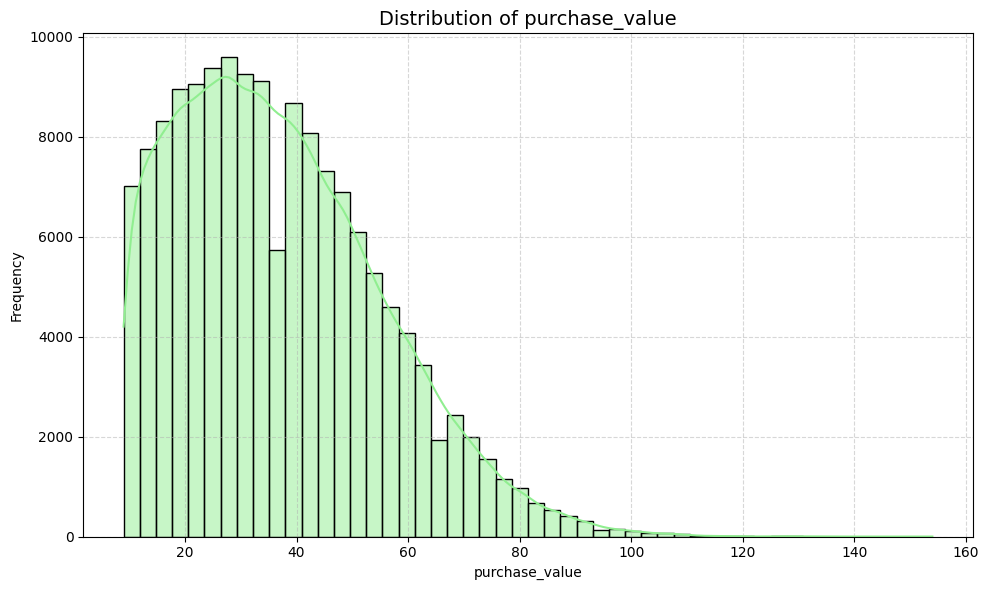

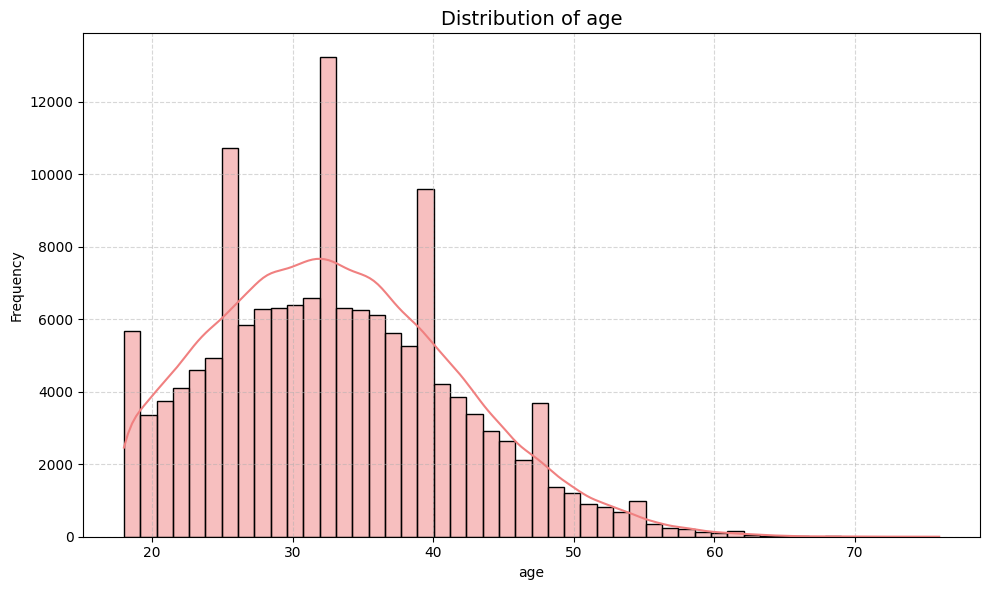

In [50]:
# Distribution plot for purchase value and age
plot_distribution(cleaned_fraud_df, 'purchase_value', bins=50, kde=True, color='lightgreen')
plot_distribution(cleaned_fraud_df, 'age', bins=50, kde=True, color='lightcoral')

## Interpretation of Purchase Value and age Distribution from fraud dataeset

- The histogram above illustrates the distribution of purchase values in the dataset. Most transactions have purchase values between 20 and 60, with the highest frequency occurring around 30 to 40. The distribution is right-skewed, indicating that higher purchase values are less common. This suggests that the majority of purchases are of smaller amounts, while large transactions are relatively rare in this dataset.

- The histogram above displays the distribution of ages in the dataset. Most users are between 25 and 45 years old, with several noticeable peaks at specific ages. The distribution is slightly right-skewed, indicating that older ages are less common. This suggests that the majority of transactions are made by younger to middle-aged users, while transactions from older users are relatively rare.


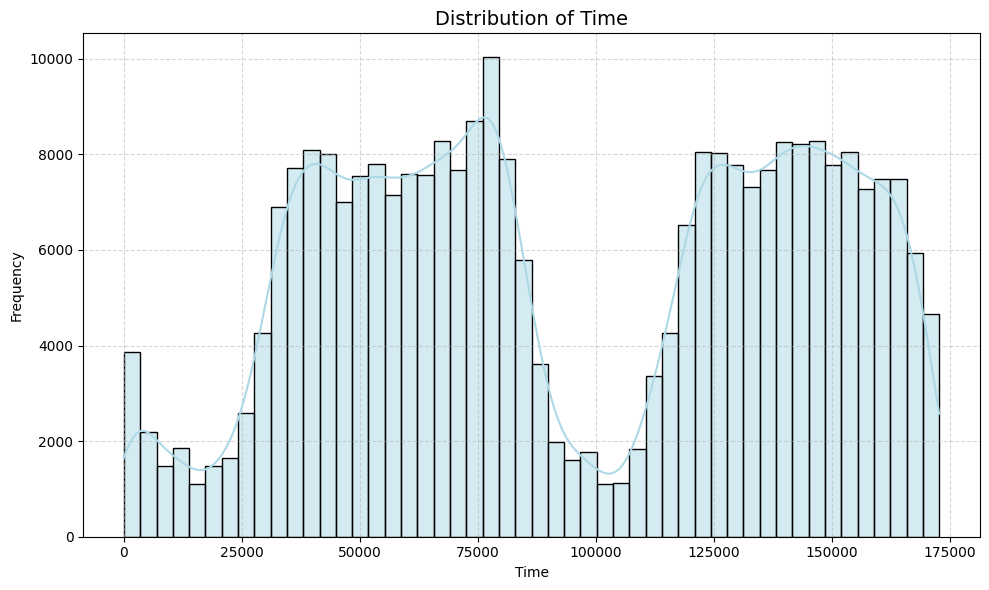

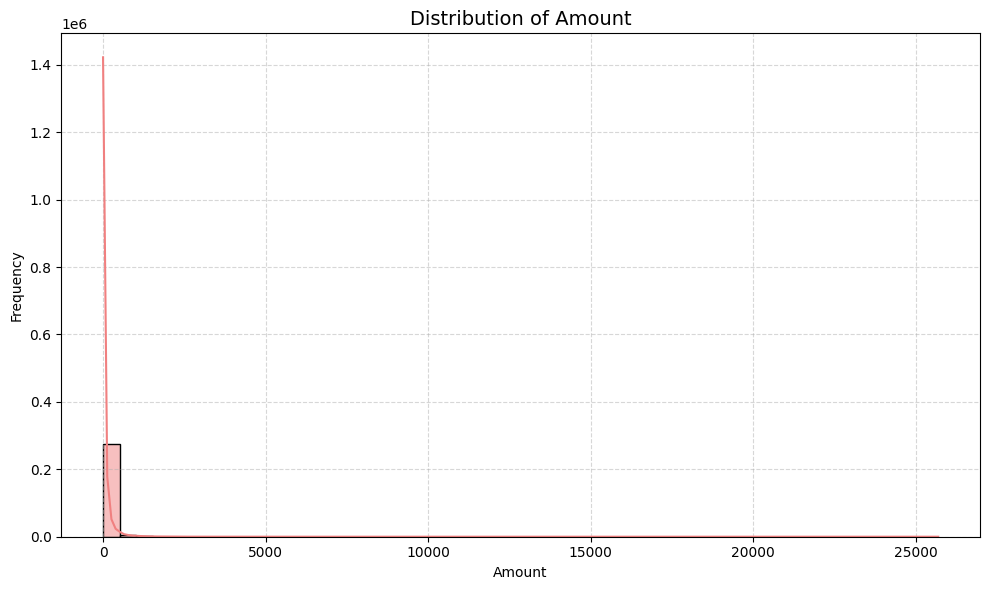

In [51]:
# Distribution plot for time and amount
plot_distribution(cleaned_creditcard_df, 'Time', bins=50, kde=True, color='lightblue')
plot_distribution(cleaned_creditcard_df, 'Amount', bins=50, kde=True, color='lightcoral')

# Interpretation of Time and Amount Distirbution from Creditcard dataset
-  The histogram above shows the distribution of transaction times in the credit card dataset. The time variable appears to have several distinct peaks and valleys, indicating that transactions are not uniformly distributed throughout the observed period. Instead, there are clusters of activity at certain intervals, possibly reflecting daily or periodic patterns in user behavior. This suggests that transaction frequency varies over time, with some periods experiencing higher activity than others.

- The histogram above shows the distribution of transaction amounts in the credit card dataset. The vast majority of transactions have very small amounts, with frequency dropping sharply as the amount increases. The distribution is highly right-skewed, indicating that large transactions are extremely rare. This suggests that most credit card transactions in the dataset are for low-value purchases, while high-value transactions occur infrequently.

In [52]:
# Fraud case counts for both datasets
print("Fraud case counts in cleaned_creditcard_df:")
print(cleaned_creditcard_df["Class"].value_counts())
print("Fraud case counts in cleaned_fraud_df:")
cleaned_fraud_df["class"].value_counts()

Fraud case counts in cleaned_creditcard_df:
Class
0    283253
1       473
Name: count, dtype: int64
Fraud case counts in cleaned_fraud_df:


class
0    136961
1     14151
Name: count, dtype: int64

# For categorical columns
- Bar plot for columns like:
    - source 
    - browser
    - sex
- count of unique value for categoica columns

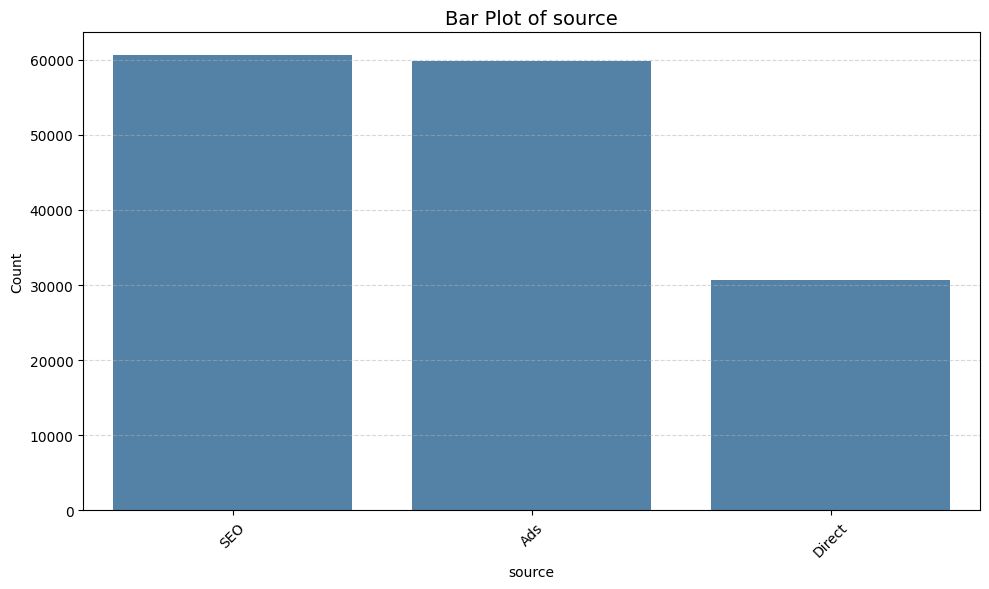

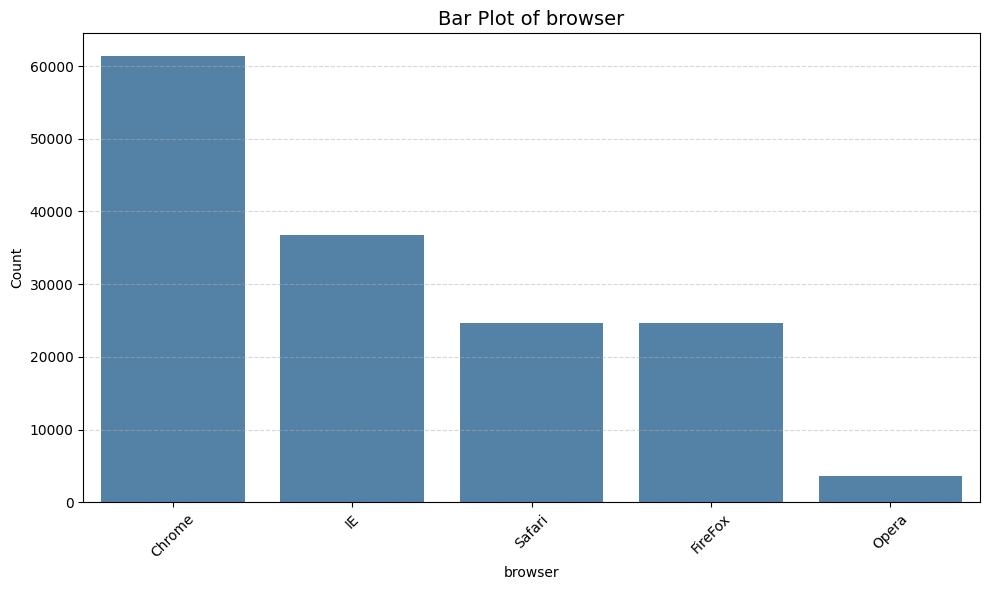

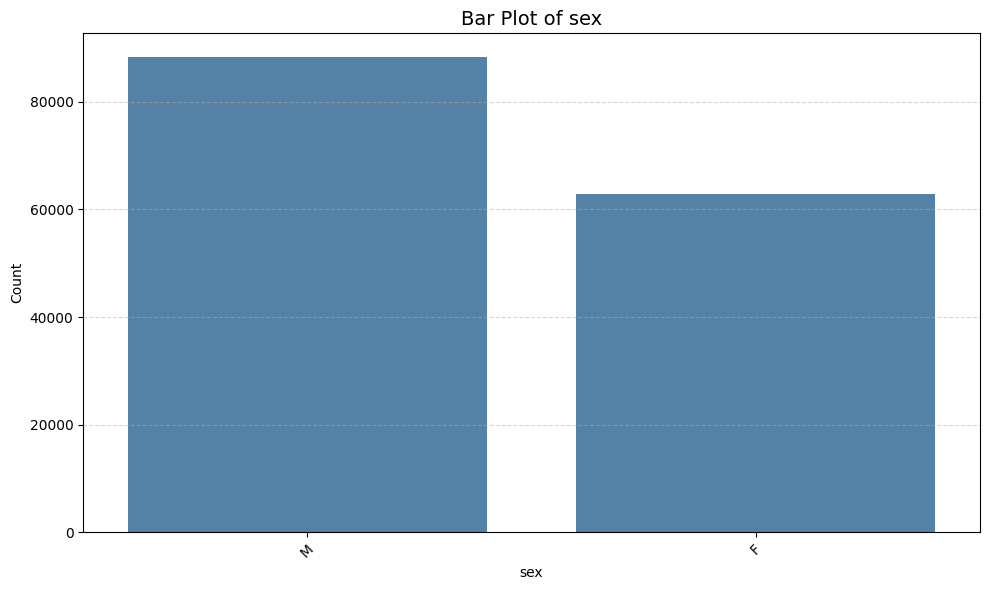

In [53]:
# Bar plot for categorical columns
categorical_cols = ["source", "browser", "sex"]

for col in categorical_cols:
    plot_bar(cleaned_fraud_df, col)

In [54]:
# count of nuique values of each categorical column
for col in categorical_cols:
    print(f"Value count of {col} column is:")
    print(cleaned_fraud_df[col].value_counts())

Value count of source column is:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
Value count of browser column is:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64
Value count of sex column is:
sex
M    88293
F    62819
Name: count, dtype: int64


Since there are about 137956 distinct device_id in the dataset creating a barplot for it is not much convenient but below are the top 15 most frequently mentioned device_id

In [55]:
# Top 15 most frequent device_idt
cleaned_fraud_df.device_id.value_counts()[:15]

device_id
CQTUVBYIWWWBC    20
NGQCKIADMZORL    20
ZUSVMDEZRBDTX    20
ITUMJCKWEYNDD    20
EQYVNEGOFLAWK    20
KIPFSCNUGOLDP    20
IGKYVZDBEGALB    19
SDJQRPKXQFBED    19
CDFXVYHOIHPYP    19
EGLGSEGYPMMAM    19
BWSMVSLCJXMCM    19
GTIYVLCMAYBFA    18
FFWAQIABHGYJC    18
XJWEQEWCBRAKD    18
QVMVTZOIJDKNR    18
Name: count, dtype: int64

# Bivariate Analysis

- Violin plot by class of:
    - purchaase_value
    - age 
    - Amount (creditcard data)

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-8&9\FraudDetectionForFinaincialTransactions\src\utils\utils.py:112: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=data, x=x, y=y, hue=hue, palette=[color])


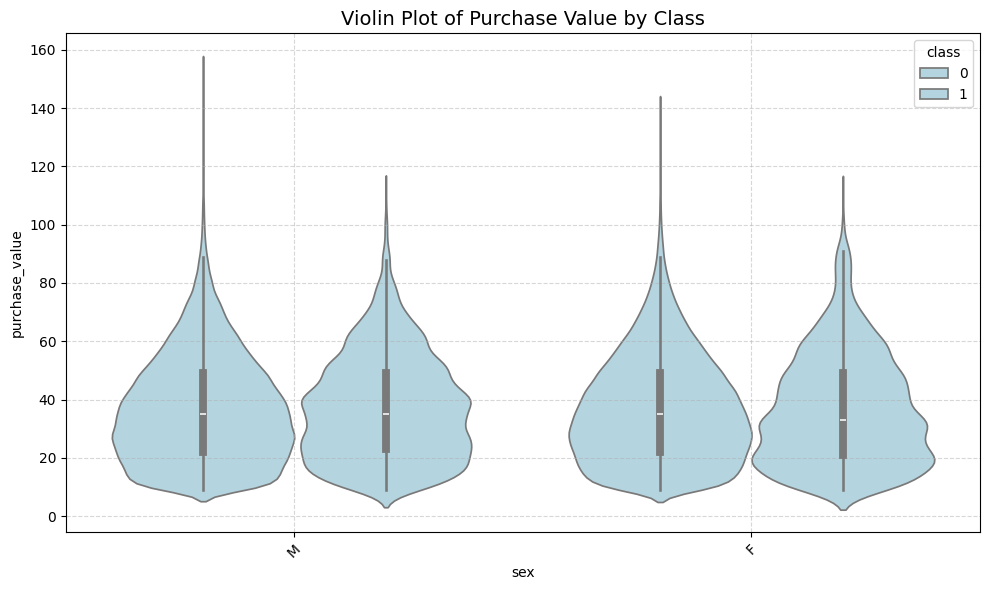

In [56]:
plot_violin(cleaned_fraud_df, x='sex', y='purchase_value', title='Violin Plot of Purchase Value by Class',hue = "class",  color='lightblue')

## Interpretation of Violin Plot: Purchase Value by Sex

The violin plot above displays the distribution of purchase values for male and female users, separated by fraud class (0: non-fraud, 1: fraud). Both male and female groups show similar distributions for both classes, with most purchase values concentrated between 20 and 60. There is no significant difference in purchase value patterns between fraud and non-fraud cases, nor between male and female users. The distributions are right-skewed, indicating that higher purchase values are less common across all groups.

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-8&9\FraudDetectionForFinaincialTransactions\src\utils\utils.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=x, y=y, hue=hue, palette=[color])
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-8&9\FraudDetectionForFinaincialTransactions\src\utils\utils.py:112: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=data, x=x, y=y, hue=hue, palette=[color])


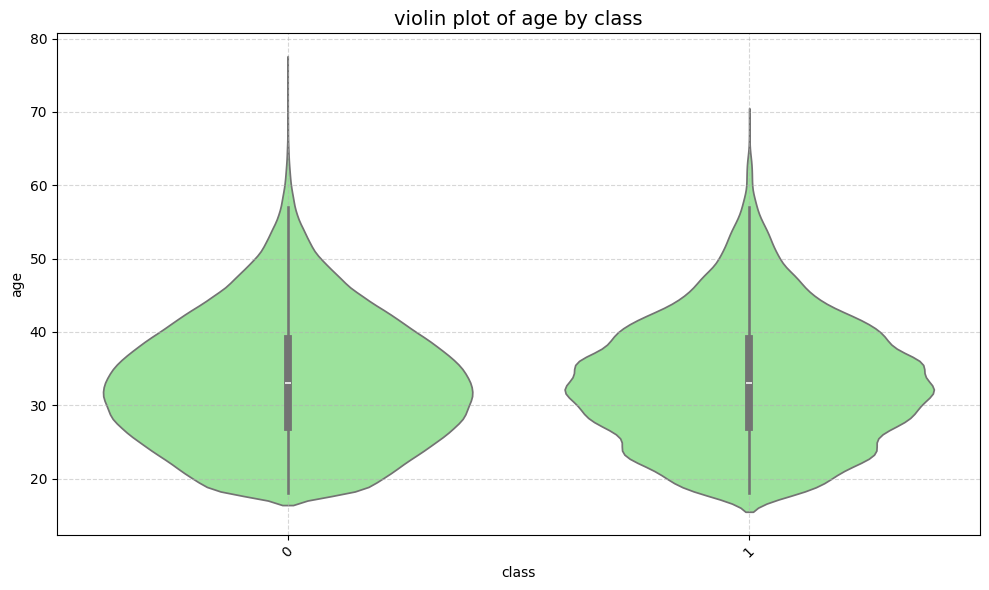

In [57]:
plot_violin(cleaned_fraud_df, x="class", y="age", title="violin plot of age by class" )

The distributon of age by fraud cases show similiar distribution across age group 

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-8&9\FraudDetectionForFinaincialTransactions\src\utils\utils.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=x, y=y, hue=hue, palette=[color])
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-8&9\FraudDetectionForFinaincialTransactions\src\utils\utils.py:112: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=data, x=x, y=y, hue=hue, palette=[color])


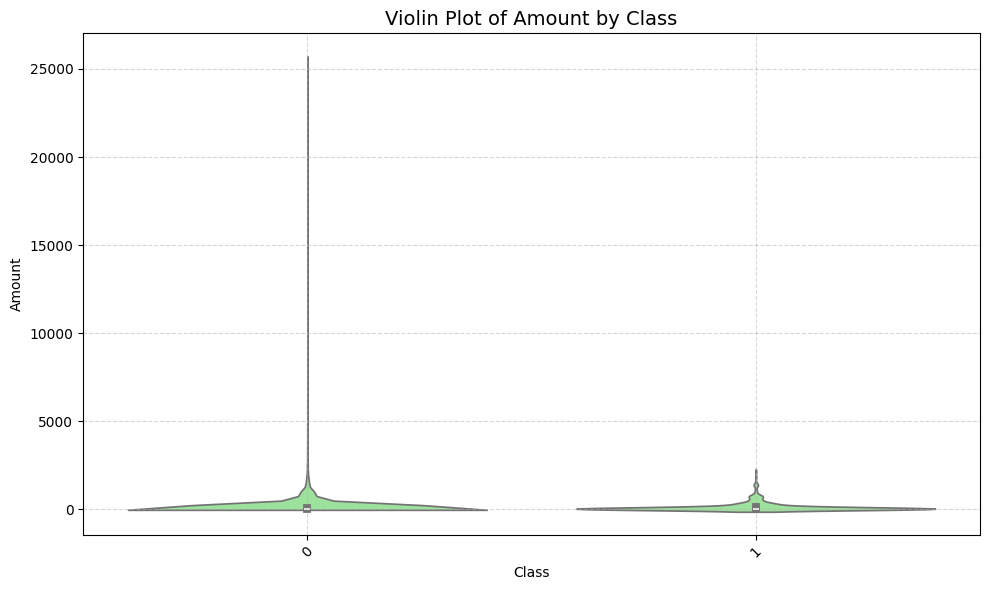

In [58]:
# Violin plot of amount by class
plot_violin(x="Class", y="Amount", data=cleaned_creditcard_df, title="Violin Plot of Amount by Class")

The violin plot above shows the distribution of transaction amounts for non-fraud (class 0) and fraud (class 1) cases in the credit card dataset. Both classes have most transactions concentrated at low amounts, with a highly right-skewed distribution. However, non-fraudulent transactions (class 0) include a few very large amounts, while fraudulent transactions (class 1) tend to have smaller amounts overall. This suggests that high-value transactions are less likely to be fraudulent, and most fraud cases involve lower transaction amounts.

### Mean and median value of Amount for the credit card data with respect to fraud status

In [59]:
# mean and median of the amount column with respect to fraud status
amount_by_fraud_status = cleaned_creditcard_df.groupby("Class").agg({"Amount": pd.Series.mean,
                                                                     "Amount": pd.Series.median})
amount_by_fraud_status

,Amount
Class,
0,22.00
1,9.82


we can see that most fraud cases are indeed ascosiated with lower transaction amount

In [60]:
creditcard_df.describe() # summary statistics for additional insight

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Stacked barplot per catagorey with respect to target class

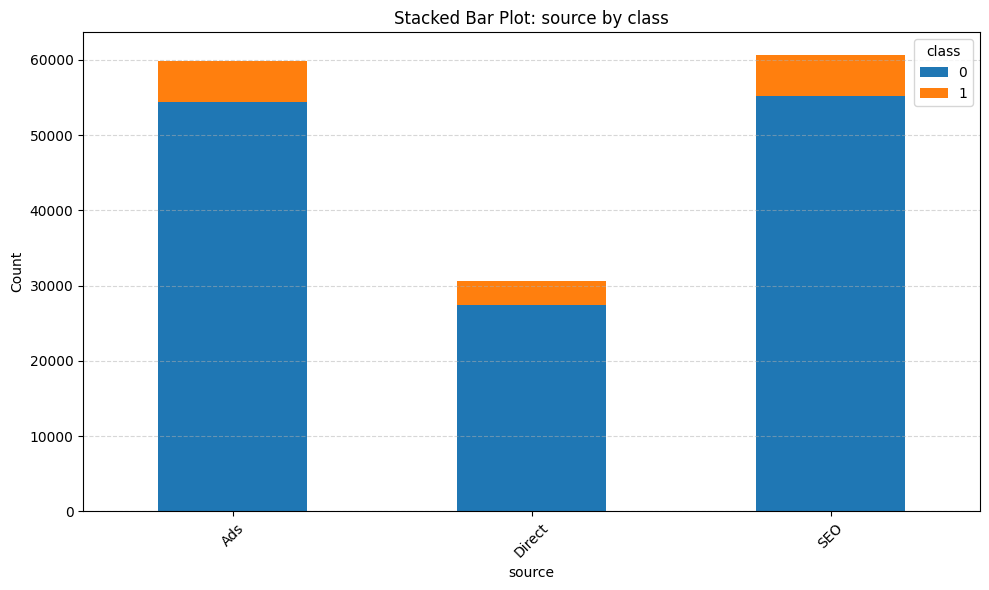

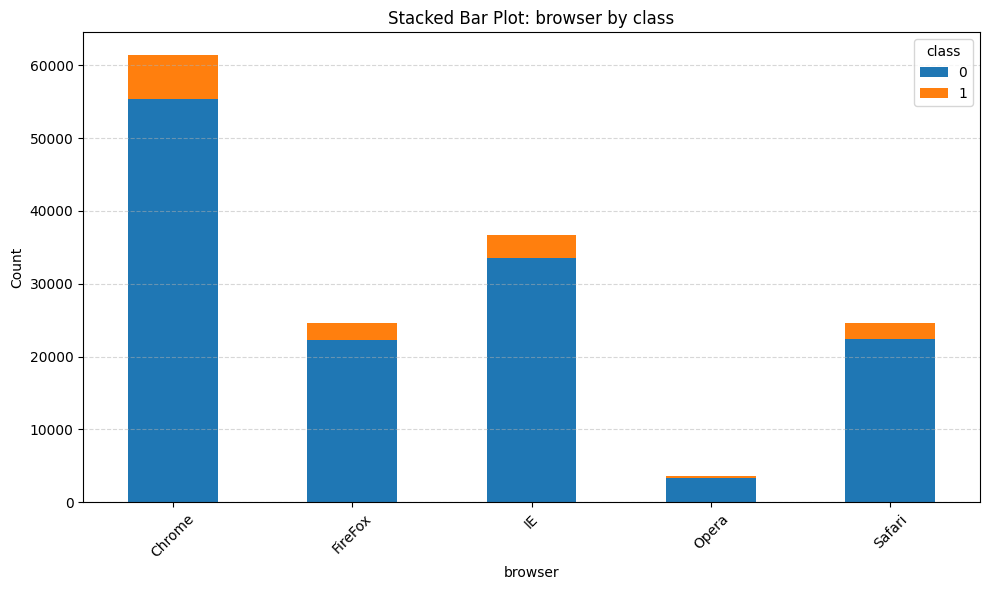

In [61]:
# stacked bar plot for the source, browser by class
cols = ["source", "browser"]
for col in cols:
    plot_stacked_bar(cleaned_fraud_df, col, "class")

From the above plots we can see that:
- fraud cases are smaller with direct sources with respect to both Adds and SEO but again there are way less transaction that result from direct sources so expected 
- fraud cases seem to be higher for chrome than other browser but again just like above there are way more transactions made through chrome than the other browsers and mostly the distributions are expected from the amount of transactions that occur throught them

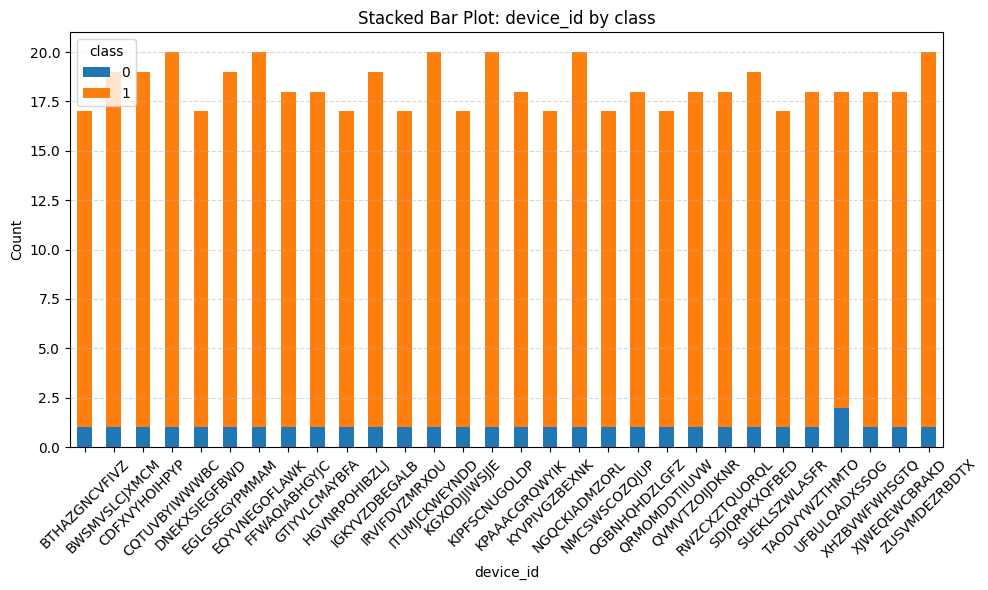

In [62]:
# for device id we will plot a stacked bar plot for the top 30 most frequent devices
top_devices_count = cleaned_fraud_df.device_id.value_counts()[:30]
devices = list(top_devices_count.index)

top_devices = cleaned_fraud_df[cleaned_fraud_df.device_id.isin(devices)]
plot_stacked_bar(top_devices,"device_id", "class")

from the above plot we can see that the top most frequent devices are the ones associated with fraud

### Corelation grapth of most numerical columns in cleaned_fraud_df

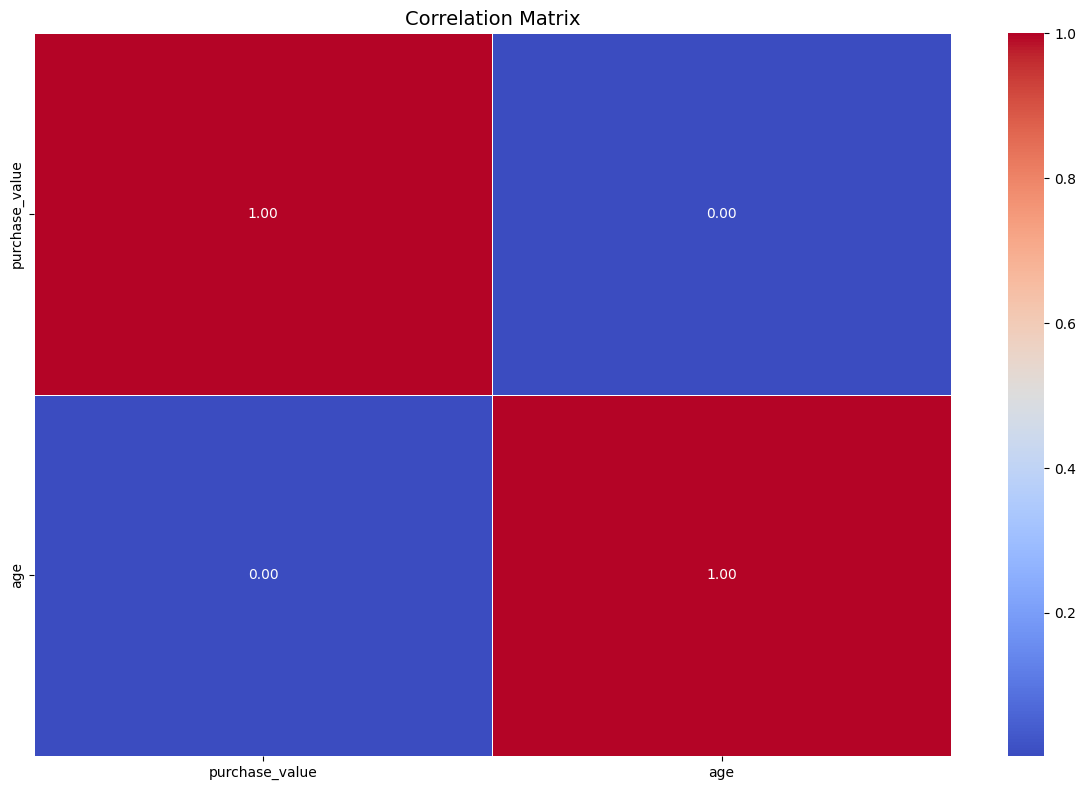

In [75]:
corr = cleaned_fraud_df[["purchase_value","age"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


#### from the corelation matrix we can see that the age and purchase value do not have a noticable corelation

## Datetime analysis
- Fraud rate over time (trend analysis)
- Time difference between signup and purchase for fraud vs non-fraud

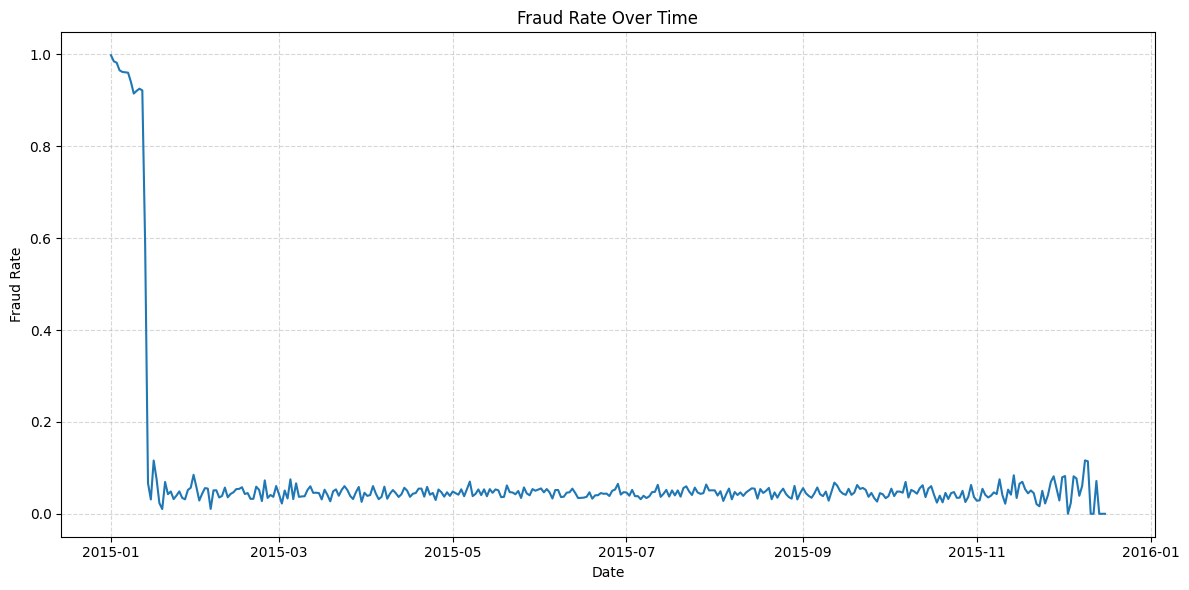

In [ ]:
# fraud rate over time
# Group by date
fraud_over_time = cleaned_fraud_df.groupby(cleaned_fraud_df['purchase_time'].dt.date)['class'].mean()

plt.figure(figsize=(12, 6))
fraud_over_time.plot()
plt.title('Fraud Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From the above plot we can see that in the earlier days of the dataset the fraud rate was very high and continued relatively constant for the rest of the dataset but that might be because the reate of transaction have grown over time since the rate of fraud also diminished too

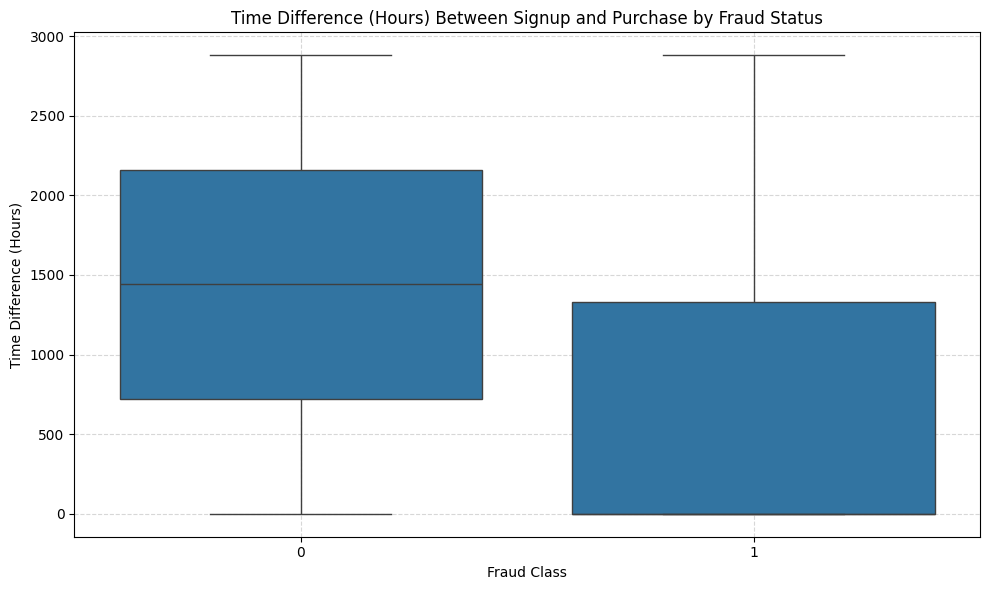

In [ ]:
# Time difference between signup and purchase for fraud vs non-fraud
# Calculate time difference in hours
cleaned_fraud_df['time_diff_hours'] = (cleaned_fraud_df['purchase_time'] - cleaned_fraud_df['signup_time']).dt.total_seconds() / 3600

# Boxplot by fraud class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='time_diff_hours', data=cleaned_fraud_df)
plt.title('Time Difference (Hours) Between Signup and Purchase by Fraud Status')
plt.xlabel('Fraud Class')
plt.ylabel('Time Difference (Hours)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The boxplot above compares the time difference (in hours) between user signup and purchase for non-fraud (class 0) and fraud (class 1) cases. On average, fraudulent transactions tend to occur sooner after signup than non-fraudulent ones. The median time difference for fraud cases is lower, and the overall spread is narrower compared to non-fraud cases. This suggests that fraudsters are more likely to make purchases quickly after creating an account, while legitimate users tend to wait longer before making a purchase.


### Merge dataset for Geolocation Analysis

In [66]:
# merge the fraud_data and ip_to_country dataframes
cleaned_fraud_df = map_ip_to_city(cleaned_fraud_df, IP_to_country_df)
cleaned_fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093.496895,0,NaN,NaN,Unknown
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447.138961,0,NaN,NaN,Unknown
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818.501505,0,NaN,NaN,Unknown
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566.664867,0,NaN,NaN,Unknown
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423.789042,0,NaN,NaN,Unknown


In [67]:
# fraud count for rows with country with an unknown label
cleaned_fraud_df[cleaned_fraud_df["country"]== "Unknown"]["class"].value_counts()

class
0    20083
1     1883
Name: count, dtype: int64

In [68]:
# The new country lable 
cleaned_fraud_df.country.value_counts()

country
United States                     58049
Unknown                           21966
China                             12038
Japan                              7306
United Kingdom                     4490
                                  ...  
Dominica                              1
Gambia                                1
Vanuatu                               1
British Indian Ocean Territory        1
Nauru                                 1
Name: count, Length: 182, dtype: int64

In [78]:
# save new datasets to data/processed
cleaned_fraud_df.to_csv("../data/processed/cleaned_fraud_data.csv", index=False)
cleaned_creditcard_df.to_csv("../data/processed/cleaned_creditcard_data.csv", index=False)
print("Cleaned datasets saved successfully✅")

Cleaned datasets saved successfully✅


# EDA And Data Cleanup Summary

## Data Cleaning and Preprocessing Steps

- **Loaded Datasets:**
  - `creditcard.csv`: Contains anonymized PCA features (V1-V28), Amount, Time, Class.
  - `Fraud_Data.csv`: Includes user_id, signup_time, purchase_time, purchase_value, device_id, source, browser, sex, age, ip_address, class.
  - `IpAddress_to_Country.csv`: Maps IP ranges to country and city.

- **Initial Inspection:**
  - Displayed dataframes and checked column datatypes.
  - Verified missing values and summary statistics for all datasets.

- **Cleaning Steps:**
  - Used `clean_data` function to handle missing values and convert datatypes.
  - Parsed datetime columns (`signup_time`, `purchase_time`).
  - Cleaned IP-to-country mapping for geolocation enrichment.

- **Saved Cleaned Data:**
  - Exported cleaned datasets to `data/processed/` for future use.

## Exploratory Data Analysis (EDA) Insights

### Univariate Analysis
- **Numeric Columns:**
  - Purchase value: Most transactions between 20-60, right-skewed.
  - Age: Majority between 25-45, right-skewed.
  - Time: Transaction frequency varies, with clusters of activity.
  - Amount: Most transactions are low-value, highly right-skewed.
- **Fraud Case Counts:**
  - Fraud is rare in both datasets, with class imbalance.

### Categorical Columns
- **Source, Browser, Sex:**
  - Bar plots show most transactions from direct sources and Chrome browser.
  - Device ID: High cardinality, focused on top 15 most frequent devices.

### Bivariate Analysis
- **Violin Plots:**
  - Purchase value by sex and class: Similar distributions, no major difference.
  - Age by class: Similar across fraud and non-fraud.
  - Amount by class: Fraud cases associated with lower transaction amounts.
- **Stacked Bar Plots:**
  - Fraud cases higher for Chrome and direct sources, but distributions reflect transaction volume.
  - Top devices more associated with fraud.
- **Correlation Matrix:**
  - No strong correlation between age and purchase value.

### Datetime Analysis
- **Fraud Rate Over Time:**
  - Higher fraud rate in early dataset period, then stabilizes.
- **Time Difference (Signup to Purchase):**
  - Fraudulent purchases occur sooner after signup than non-fraudulent ones.

### Geolocation Enrichment
- Merged fraud data with IP-to-country mapping for location-based analysis.
- Identified transactions with unknown country labels.

## Key Takeaways
- Most fraud cases involve lower transaction amounts and quick purchases after signup.
- Device, browser, and source patterns reflect transaction volume, not necessarily fraud risk.
- Geolocation enrichment enables further analysis of fraud by country/city.